In [1]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\zig53\vscode jupyther\Datasets\BTC-USDT.csv')

df['Datetime'] = pd.to_datetime(df['datetime'])
df.reset_index()
df = df.set_index('Datetime')
del df['datetime']
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-06-11 07:00:00 to 2022-06-10 07:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  365 non-null    object 
 1   open    365 non-null    float64
 2   high    365 non-null    float64
 3   low     365 non-null    float64
 4   close   365 non-null    float64
 5   volume  365 non-null    float64
dtypes: float64(5), object(1)
memory usage: 20.0+ KB


In [3]:
macd = ta.macd(df['close'] , fast = 12 , slow = 26 )

#rename col
macd.columns = ['macd', 'hist', 'signal']

#Reaarange col

macd = macd.loc[:,['macd', 'signal', 'hist']]
macd.info()




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-06-11 07:00:00 to 2022-06-10 07:00:00
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   macd    340 non-null    float64
 1   signal  332 non-null    float64
 2   hist    332 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB


In [4]:
#macd buy-sell signal 
 # buy when hist >0 sell when hist <0
## Add actions
macd['hist_shift'] = macd['hist'].shift(1)
macd.loc[(macd['hist'] > 0 ) & (macd['hist_shift'] < 0 ), 'action'] = 'buy'
macd.loc[(macd['hist'] < 0 ) & (macd['hist_shift'] > 0 ), 'action'] = 'sell'




In [5]:
#to make sure that there's action
macd[macd['action'].notnull()]

#join DFs
df2 = pd.concat([df,macd], axis =1)
df2

,symbol,open,high,low,close,volume,macd,signal,hist,hist_shift,action
Datetime,,,,,,,,,,,
2021-06-11 07:00:00,BINANCE:BTCUSDT,36677.83,37680.40,35936.77,37331.98,78466.005300,NaN,NaN,NaN,NaN,NaN
2021-06-12 07:00:00,BINANCE:BTCUSDT,37331.98,37463.63,34600.36,35546.11,87717.549990,NaN,NaN,NaN,NaN,NaN
2021-06-13 07:00:00,BINANCE:BTCUSDT,35546.12,39380.00,34757.00,39020.57,86921.025555,NaN,NaN,NaN,NaN,NaN
2021-06-14 07:00:00,BINANCE:BTCUSDT,39020.56,41064.05,38730.00,40516.29,108522.391949,NaN,NaN,NaN,NaN,NaN
2021-06-15 07:00:00,BINANCE:BTCUSDT,40516.28,41330.00,39506.40,40144.04,80679.622838,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06 07:00:00,BINANCE:BTCUSDT,29919.20,31765.64,29890.23,31373.10,68836.924560,-713.312451,-1131.323867,418.011416,352.866688,NaN
2022-06-07 07:00:00,BINANCE:BTCUSDT,31373.10,31589.60,29218.96,31125.33,110668.861990,-592.033890,-1023.465872,431.431982,418.011416,NaN
2022-06-08 07:00:00,BINANCE:BTCUSDT,31125.32,31327.22,29843.88,30204.77,68542.612760,-563.703235,-931.513344,367.810109,431.431982,NaN


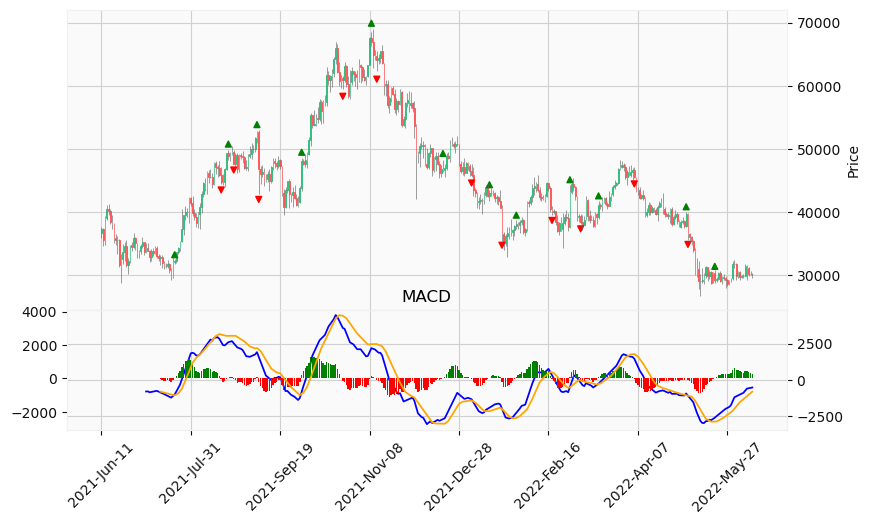

In [6]:
#Let's Vizualised 
   # ทำ addplot ก่อนแล้วค่อยเรียกทีเดียวเหมือนวาดรูปเล็กไปกระกอบใส่ในรูปใหญ่
macd_mpf = mpf.make_addplot(df2['macd'], panel = 1, color = 'blue', title = 'MACD')

signal_mpf = mpf.make_addplot(df2['signal'], panel = 1, color = 'orange')

#There's 2 colors of histogram (red and green)
    # Red when hist < 0 , Green when hist > 0
    #So we have to decide colors by using list comprehension method


colors = ['green' if i > 0 else 'red' for i in df2['hist']]

#Hist

hist_mpf = mpf.make_addplot(df2['hist'], type = 'bar', panel = 1, color = colors)

#Signal's Plot 
    # Markers

markers = ['^' if i == 'buy' else 'v' for i in df2['action']]
marker_colors = ['green' if i == 'buy' else 'red' for i in df2['action']]
    #make marker's position
df2.loc[df2['action'] == 'buy','marker_positions'] = df2['high'] * 1.02
df2.loc[df2['action'] == 'sell', 'marker_positions'] =  df2['low'] * 0.98

bs_signal = mpf.make_addplot(df2['marker_positions'], type = 'scatter', marker = markers, color = marker_colors )

adds = [macd_mpf, signal_mpf, hist_mpf, bs_signal]

#Let's Plot

mpf.plot(df2 , type = 'candle', style = 'yahoo' , figsize = (10,6), addplot = adds)






In [7]:
## Return Cal 
##Long
df2.loc[df2['action'].notna(), 'actions_price'] = df2['close']

backtest = df2.loc[df2['action'].notna(),['action','actions_price']]
backtest



backtest.loc[backtest['action'] == 'buy', 'buy_price'] = backtest['actions_price']

backtest.loc[backtest['action'] == 'sell', 'sell_price' ] = backtest['actions_price']
backtest['sell_price'] = backtest['sell_price'].shift(-1)
backtest['pct_change'] = (backtest['sell_price'] - backtest['buy_price'])/backtest['buy_price'] * 100
backtest


,action,actions_price,buy_price,sell_price,pct_change
Datetime,,,,,
2021-07-22 07:00:00,buy,32287.83,32287.83,44695.95,38.429712
2021-08-17 07:00:00,sell,44695.95,NaN,NaN,NaN
2021-08-21 07:00:00,buy,48821.87,48821.87,47674.01,-2.351118
2021-08-24 07:00:00,sell,47674.01,NaN,NaN,NaN
2021-09-06 07:00:00,buy,52663.90,52663.90,46863.73,-11.013560
2021-09-07 07:00:00,sell,46863.73,NaN,NaN,NaN
2021-10-01 07:00:00,buy,48141.61,48141.61,60852.22,26.402544
2021-10-24 07:00:00,sell,60852.22,NaN,NaN,NaN
2021-11-09 07:00:00,buy,66947.66,66947.66,64122.23,-4.220357


Total return is 114.9913598420585%
Profit return is 14.9913598420585%


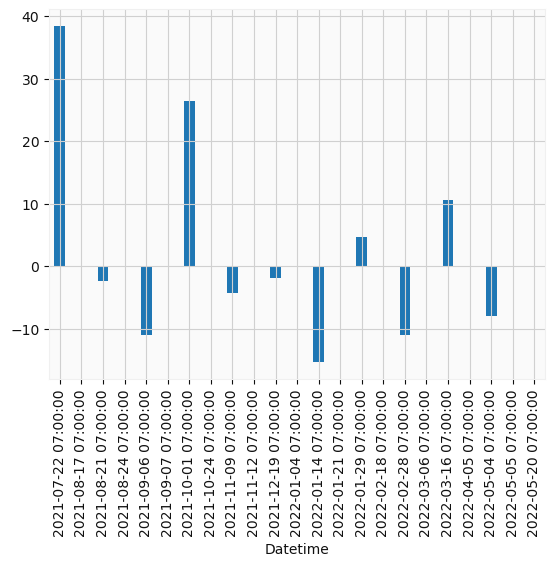

In [8]:
## Return Viz
backtest['pct_change'].plot(kind = 'bar')

backtest['pct_change'] = backtest['pct_change'].fillna(0)
backtest
change = [ (1+i) if i > 0 else (1+i) for i in backtest['pct_change']/100]
total_return = pd.DataFrame(change).prod() * 100
print('Total return is ' + str(total_return[0]) + '%')
print('Profit return is ' + str(total_return[0]-100) + '%')

# มีปัญหาเยอะเรื่อง NaN